## Data Loading

In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve

In [2]:
file = tf.keras.utils
raw_df = pd.read_csv('/content/drive/MyDrive/Oxford/background.csv')
cleaned_df = raw_df.copy()

train_df = pd.read_csv('/content/drive/MyDrive/Oxford/train.csv')
outcomes_df = train_df.copy()

<ipython-input-2-f07354eb9be6>:2: DtypeWarning: Columns (5168,5272,5328,5329,5340,5341,5351,5470,5479,5661,5663,5685,5695,5696,5706,5764,5772,5788,5803,5815,5816,5828,5900,5901,5937,5946,5965,5966,9287,12349,12353,12356) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('/content/drive/MyDrive/Oxford/background.csv')


In [3]:
cleaned_df

,challengeID,cf1intmon,cf1intyr,cf1lenhr,cf1lenmin,cf1twoc,cf1fint,cf1natsm,f1natwt,cf1natsmx,...,m4d9,m4e23,f4d6,f4d7,f4d9,m5c6,m5d20,m5k10,f5c6,k5f1
0,1,-3,-3,-9,-9,-3,0,-3,-3,-3,...,6.269946,5.180325,2.511131,1.718804,6.473537,16.369411,4.476881,9.628369,15.981275,24.038266
1,2,-3,-3,0,40,-3,1,-3,-3,-3,...,6.269946,27.680196,2.511131,1.718804,6.473537,16.369411,26.671897,9.628369,15.981275,3.667679
2,3,-3,-3,0,45,-3,1,-3,-3,-3,...,6.269946,5.180325,20.867881,24.115867,6.473537,16.369411,4.476881,9.628369,15.981275,24.038266
3,4,-3,-3,0,45,-3,1,-3,-3,-3,...,6.269946,5.180325,22.018875,22.932641,6.473537,-5.169243,4.476881,9.628369,-6.303171,4.140511
4,5,-3,-3,-6,50,-3,1,-3,-3,-3,...,6.269946,5.180325,22.916602,22.988036,6.473537,-6.034660,4.476881,9.628369,-6.211828,3.668879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4237,4238,-3,-3,-9,-9,-3,0,-3,-3,-3,...,27.941956,5.180325,2.511131,1.718804,6.473537,16.369411,4.476881,9.628369,15.981275,24.038266
4238,4239,-3,-3,0,40,-3,1,-3,-3,-3,...,28.703663,5.180325,2.511131,1.718804,6.473537,16.369411,4.476881,9.628369,15.981275,3.424922
4239,4240,-3,-3,-9,-9,-3,0,-3,-3,-3,...,6.269946,26.990283,2.511131,1.718804,6.473537,16.369411,4.476881,9.628369,15.981275,24.038266
4240,4241,-3,-3,1,0,-3,1,-3,-3,-3,...,6.269946,27.189692,2.511131,1.718804,28.512659,16.369411,4.476881,9.628369,-6.009855,3.656543


In [4]:
outcomes_df

,challengeID,gpa,grit,materialHardship,eviction,layoff,jobTraining
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,3,NaN,NaN,NaN,NaN,NaN,NaN
2,6,NaN,3.50,0.090909,0.0,0.0,0.0
3,7,2.50,3.25,0.000000,0.0,0.0,0.0
4,8,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2116,4235,NaN,NaN,NaN,NaN,NaN,NaN
2117,4236,NaN,3.75,0.000000,0.0,0.0,0.0
2118,4239,2.75,2.75,0.000000,0.0,0.0,0.0
2119,4240,NaN,NaN,NaN,NaN,NaN,NaN


## Initial Data Preparation
- Cast any strings to numeric where applicable
- Cast categorical variables as integer representations
(-3, -9 = NaN, -10 = Other, -11 = unknown or refuse)
- Remove columns that didn't fit into either of those
- Remove columns with no variation or all null
- Separate variables of interest from control variables

In [5]:
categorical = cleaned_df.loc[:, cleaned_df.nunique() < 30]
numerical = cleaned_df.loc[:, cleaned_df.nunique() >= 30]

In [6]:
#Replace numerical values that are missing with NaN
categorical = categorical.replace("Missing", np.NAN)
categorical = categorical.replace('NA', np.NAN)
categorical = categorical.replace('Other', -10)

numerical = numerical.replace(-3, np.NaN)
numerical = numerical.replace(-9, np.NaN)
numerical = numerical.replace(-6, np.NaN)
numerical = numerical.replace(-1, np.NaN)
numerical = numerical.replace(-2, np.NaN)
numerical = numerical.replace("Other", np.NaN)

In [7]:
#Dropping columns with more than 80% missing
missing_percentage = categorical.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > 80].index
categorical = categorical.drop(columns_to_drop, axis=1)

categorical.cf4fint = pd.to_datetime(categorical.cf4fint)
categorical = categorical.drop(categorical.columns[categorical.nunique() == 1],axis=1)

#Dropping columns with more than 80% missing
missing_percentage = numerical.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > 80].index
numerical = numerical.drop(columns_to_drop, axis=1)
numerical = numerical.drop(numerical.columns[numerical.nunique() == 1],axis=1)

In [8]:
string_columns = ['ch5ppvtae', 'ch5wj9ae', 'ch5wj10ae']
convert_to_float = ['ch5wj9pr','ch5ppvtpr','ch5wj10pr']

# Drop string columns from df1 and add them to df2
for column in string_columns:
    categorical[column] = numerical[column]  # Add string column to df2
    numerical.drop(column, axis=1, inplace=True)  # Drop string column from df1

# Convert columns to floats
numerical = numerical.replace("<0.1", "0")
for column in convert_to_float:
  numerical[column] = numerical[column].astype(float)

In [9]:
#Impute missing data using knn
from sklearn.impute import KNNImputer
numerical = numerical.astype(float)
imputer = KNNImputer(n_neighbors=3)  # You can adjust the number of neighbors as needed
numerical_imputed = pd.DataFrame(imputer.fit_transform(numerical), columns=numerical.columns)

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each string column and apply label encoding
for column in string_columns:
    categorical[column] = label_encoder.fit_transform(categorical[column])

In [11]:
# Removing variables of interest from training data after their missing values have been imputed
selected_columns = categorical.loc[:,categorical.columns.str.startswith('m2b25a')]
categorical = categorical.drop(selected_columns.columns, axis=1)

In [12]:
#One hot encode the categorical columns
cat_columns = categorical.columns
one_hot = pd.get_dummies(categorical, columns=cat_columns)
result = pd.concat([numerical_imputed, one_hot], axis=1)
result = result.dropna(axis='columns')

In [13]:
train_ids = outcomes_df.challengeID.values.tolist()
X_train = result[result['challengeID'].isin(train_ids)]
y_train = outcomes_df.copy()

In [14]:
# Define a function to replace specific values
def replace_values(x):
    return x.replace([-9, -6, -2, 2], 0)

# Apply the function to each column
selected_columns = selected_columns.apply(replace_values)

In [15]:
selected_columns = selected_columns.rename(columns={'m2b25a1': 'childs_father', 'm2b25a2': 'mothers_partner',
                        'm2b25a3': 'childs_sibling', 'm2b25a4': 'maternal_grandparent',
                        'm2b25a5': 'maternal_relative', 'm2b25a6': 'paternal_grandparent',
                        'm2b25a7': 'paternal_relative', 'm2b25a8': 'fathers_partner',
                        'm2b25a9': 'mothers_partners_relative','m2b25a10': 'non_relative',
                        'm2b25a11': 'daycare_center','m2b25a12': 'headstart',
                        'm2b25a13': 'other'})

In [16]:
for col1 in selected_columns.columns:
    interaction_col_name = f"{col1}_income"
    # Create interaction term column in df1
    selected_columns[interaction_col_name] = numerical_imputed["cf2povco"] * selected_columns[col1]

In [17]:
selected_columns['challengeID'] = X_train['challengeID']

## Feature Selection

### Lasso

In [18]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

In [19]:
X_train.set_index('challengeID', inplace=True)

In [20]:
y_train.set_index('challengeID', inplace=True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_train, y_train, test_size=0.50, random_state=42)

In [22]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

# parameters to be tested on GridSearchCV
#params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
#kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
#lasso = Lasso()

# GridSearchCV with model, params and folds.
#lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
#lasso_cv.fit(X_train, y_train)
#print("Best Params {}".format(lasso_cv.best_params_))

In [23]:
# calling the model with the best parameter
not_missing_indices = ~y_train['gpa'].isnull()
X_train_filtered = X_train[not_missing_indices]
y_train_filtered = y_train['gpa'][not_missing_indices]

lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train_filtered, y_train_filtered)

# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)

names=X_train.columns

# Subsetting the features which has more than 0.001 importance.
feature_subset=np.array(names)[lasso1_coef>0.001]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.168e-01, tolerance: 3.626e-02
  model = cd_fast.enet_coordinate_descent(


In [24]:
X_train = X_train[feature_subset]
X_val = X_val[feature_subset]
X_test = X_test[feature_subset]

### Mutual Information Selection

In [25]:
from sklearn.feature_selection import mutual_info_regression
not_missing_indices = ~y_train['gpa'].isnull()
X_train_filtered = X_train[not_missing_indices]
y_train_filtered = y_train['gpa'][not_missing_indices]

mutual_info = mutual_info_regression(X_train_filtered, y_train_filtered)

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

ch5wj10ss    0.099662
f5a6c01      0.095138
cm2alvf      0.093608
cm1inpov     0.086990
f3j59_2      0.076889
               ...   
f4b20a_3     0.000000
f2k25b_-6    0.000000
f4c7e_2      0.000000
f4c25_2      0.000000
f2d3_1       0.000000
Length: 2013, dtype: float64

In [26]:
from sklearn.feature_selection import SelectPercentile

selected_top_columns = SelectPercentile(mutual_info_regression, percentile=1)
selected_top_columns.fit(X_train_filtered, y_train_filtered)
selected_top_columns.get_support()

array([False, False, False, ..., False, False, False])

In [27]:
columns = X_train.columns[selected_top_columns.get_support()]
X_train = X_train[columns]
X_val = X_val[columns]
X_test = X_test[columns]

In [28]:
X_train = pd.merge(X_train, selected_columns, how='left', left_index=True, right_on = 'challengeID')
X_train.reset_index(drop=True, inplace=True)
X_val = pd.merge(X_val, selected_columns, how='left', left_index=True, right_on = 'challengeID')
X_val.reset_index(drop=True, inplace=True)
X_test = pd.merge(X_test, selected_columns, how='left', left_index=True, right_on = 'challengeID')
X_test.reset_index(drop=True, inplace=True)

In [29]:
X_train.drop(columns=['challengeID'], inplace=True)
X_val.drop(columns=['challengeID'], inplace=True)
X_test.drop(columns=['challengeID'], inplace=True)

In [30]:
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

## Model Testing - Continuous

### Linear Regression

In [31]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform
from sklearn.metrics import r2_score

In [32]:
for col in outcomes_df.columns[1:4]:

  model = LinearRegression(copy_X=False)
  param_distributions = {'fit_intercept': [True, False], 'positive': [True, False],
                       'copy_X': [True, False], 'n_jobs': [1, 2, 3, 4, -1]}

  not_missing_indices = ~y_train[col].isnull()
  X_train_filtered = X_train[not_missing_indices]
  y_train_filtered = y_train[col][not_missing_indices]

  not_missing_val = ~y_val[col].isnull()
  X_val_filtered = X_val[not_missing_val]
  y_val_filtered = y_val[col][not_missing_val]

  random_search = RandomizedSearchCV(model, param_distributions, cv=5, scoring='neg_mean_squared_error', n_iter=5)
  random_search.fit(X_train_filtered, y_train_filtered)

  best_lin = random_search.best_estimator_
  score = cross_val_score(best_lin,X_val_filtered,y_val_filtered,cv=10)

  print(f"{col}: {np.mean(abs(score))}")

gpa: 0.11552354109530523
grit: 0.08184306192804922
materialHardship: 0.07646361595567673


### XGBoost
Code originated and edited from https://jayant017.medium.com/hyperparameter-tuning-in-xgboost-using-randomizedsearchcv-88fcb5b58a73

In [33]:
X_train.columns = X_train.columns.str.replace(r'[^a-zA-Z0-9]', '_')
X_val.columns = X_val.columns.str.replace(r'[^a-zA-Z0-9]', '_')
X_test.columns = X_test.columns.str.replace(r'[^a-zA-Z0-9]', '_')

In [34]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

for col in outcomes_df.columns[1:4]:
  xreg = xgboost.XGBRegressor()

  params = {
  'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
  'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
  'min_child_weight': [ 1, 3, 5, 7 ],
  'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
  'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ]
  }

  not_missing_indices = ~y_train[col].isnull()
  X_train_filtered = X_train[not_missing_indices]
  y_train_filtered = y_train[col][not_missing_indices]

  not_missing_val = ~y_val[col].isnull()
  X_val_filtered = X_val[not_missing_val]
  y_val_filtered = y_val[col][not_missing_val]

  rs_model=RandomizedSearchCV(xreg,param_distributions=params,n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)
  rs_model.fit(X_train_filtered,y_train_filtered)

  regressor=rs_model.best_estimator_
  score=cross_val_score(regressor,X_val_filtered,y_val_filtered,cv=10)

  print(f"{col}: {np.mean(abs(score))}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


gpa: 0.12464045314333064
Fitting 5 folds for each of 5 candidates, totalling 25 fits
grit: 0.06170344207150032
Fitting 5 folds for each of 5 candidates, totalling 25 fits
materialHardship: 0.025194045835517688


### Random Forest
Code originated and edited from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

for col in outcomes_df.columns[1:4]:
  rf = RandomForestRegressor(random_state = 42)

  # Number of trees in random forest
  n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
  # Maximum number of levels in tree
  max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
  max_depth.append(None)
  # Minimum number of samples required to split a node
  min_samples_split = [2, 5, 10]
  # Minimum number of samples required at each leaf node
  min_samples_leaf = [1, 2, 4]
  # Method of selecting samples for training each tree
  bootstrap = [True, False]
  # Create the random grid
  random_grid = {'n_estimators': n_estimators,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

  not_missing_indices = ~y_train[col].isnull()
  X_train_filtered = X_train[not_missing_indices]
  y_train_filtered = y_train[col][not_missing_indices]

  not_missing_val = ~y_val[col].isnull()
  X_val_filtered = X_val[not_missing_val]
  y_val_filtered = y_val[col][not_missing_val]

  rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
  # Fit the random search model
  rf_random.fit(X_train_filtered, y_train_filtered)

  best_rf = rf_random.best_estimator_
  score=cross_val_score(best_rf,X_val_filtered,y_val_filtered,cv=10)
  print(f"{col}: {np.mean(abs(score))}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
gpa: 0.14380119551597187
Fitting 5 folds for each of 5 candidates, totalling 25 fits
grit: 0.07684187388618904
Fitting 5 folds for each of 5 candidates, totalling 25 fits
materialHardship: 0.09499583608474992


## Model Testing - Categorical

In [36]:
merged_df = X_train.join(y_train)

In [37]:
# Upsample class 'B' to have the same number of rows as class 'A'
not_missing_indices = ~merged_df['eviction'].isnull()
merged_df_filtered = merged_df['eviction'][not_missing_indices]

upsampled_class_1_evic = merged_df[merged_df['eviction'] == 1.0].sample(n=merged_df['eviction'].value_counts()[0.0], replace=True)

# Concatenate original DataFrame with upsampled class 'B'
upsampled_df_evic = pd.concat([merged_df[merged_df['eviction'] == 0.0], upsampled_class_1_evic], ignore_index=True)
X_train_evic = upsampled_df_evic.iloc[:,:-6]
Y_train_evic = upsampled_df_evic.iloc[:,-6:]

In [38]:
# Upsample class 'B' to have the same number of rows as class 'A'
not_missing_indices = ~merged_df['layoff'].isnull()
merged_df_filtered = merged_df['layoff'][not_missing_indices]

upsampled_class_1_layoff = merged_df[merged_df['layoff'] == 1.0].sample(n=merged_df['layoff'].value_counts()[0.0], replace=True)

# Concatenate original DataFrame with upsampled class 'B'
upsampled_df_layoff = pd.concat([merged_df[merged_df['layoff'] == 0.0], upsampled_class_1_layoff], ignore_index=True)
X_train_layoff = upsampled_df_layoff.iloc[:,:-6]
Y_train_layoff = upsampled_df_layoff.iloc[:,-6:]

In [39]:
# Upsample class 'B' to have the same number of rows as class 'A'
not_missing_indices = ~merged_df['jobTraining'].isnull()
merged_df_filtered = merged_df['jobTraining'][not_missing_indices]

upsampled_class_1_job = merged_df[merged_df['jobTraining'] == 1.0].sample(n=merged_df['jobTraining'].value_counts()[0.0], replace=True)

# Concatenate original DataFrame with upsampled class 'B'
upsampled_df_job = pd.concat([merged_df[merged_df['jobTraining'] == 0.0], upsampled_class_1_job], ignore_index=True)
X_train_job = upsampled_df_job.iloc[:,:-6]
Y_train_job = upsampled_df_job.iloc[:,-6:]

### Logistic Regression

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
not_missing_test = ~y_test['eviction'].isnull()
X_test_filtered = X_test[not_missing_test]
y_test_filtered = y_test['eviction'][not_missing_test]

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train_evic, Y_train_evic['eviction'])
model.score(X_test_filtered, y_test_filtered)

0.6527777777777778

In [42]:
not_missing_test = ~y_test['layoff'].isnull()
X_test_filtered = X_test[not_missing_test]
y_test_filtered = y_test['layoff'][not_missing_test]

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train_layoff, Y_train_layoff['layoff'])
model.score(X_test_filtered, y_test_filtered)

0.5963718820861678

In [43]:
not_missing_test = ~y_test['jobTraining'].isnull()
X_test_filtered = X_test[not_missing_test]
y_test_filtered = y_test['jobTraining'][not_missing_test]

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train_job, Y_train_job['jobTraining'])
model.score(X_test_filtered, y_test_filtered)

0.6514851485148515

### XGBoost
Code originated and edited from https://jayant017.medium.com/hyperparameter-tuning-in-xgboost-using-randomizedsearchcv-88fcb5b58a73

In [44]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [45]:
xreg = xgboost.XGBClassifier()

params = {
'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
'min_child_weight': [ 1, 3, 5, 7 ],
'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ]
}

not_missing_val = ~y_val['eviction'].isnull()
X_val_filtered = X_val[not_missing_val]
y_val_filtered = y_val['eviction'][not_missing_val]

rs_model=RandomizedSearchCV(xreg,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X_train_evic,Y_train_evic['eviction'])

classifier=rs_model.best_estimator_
score=cross_val_score(classifier,X_val_filtered,y_val_filtered,cv=10)

print(f"{np.mean(abs(score))}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.9610105580693815


In [46]:
xreg = xgboost.XGBClassifier()

params = {
'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
'min_child_weight': [ 1, 3, 5, 7 ],
'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ]
}

not_missing_val = ~y_val['layoff'].isnull()
X_val_filtered = X_val[not_missing_val]
y_val_filtered = y_val['layoff'][not_missing_val]

rs_model=RandomizedSearchCV(xreg,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X_train_layoff,Y_train_layoff['layoff'])

classifier=rs_model.best_estimator_
score=cross_val_score(classifier,X_val_filtered,y_val_filtered,cv=10)

print(f"{np.mean(abs(score))}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.7682125603864735


In [47]:
xreg = xgboost.XGBClassifier()

params = {
'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
'min_child_weight': [ 1, 3, 5, 7 ],
'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ]
}

not_missing_val = ~y_val['jobTraining'].isnull()
X_val_filtered = X_val[not_missing_val]
y_val_filtered = y_val['jobTraining'][not_missing_val]

rs_model=RandomizedSearchCV(xreg,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X_train_job,Y_train_job['jobTraining'])

classifier=rs_model.best_estimator_
score=cross_val_score(classifier,X_val_filtered,y_val_filtered,cv=10)

print(f"{np.mean(abs(score))}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.7213800904977375


### Random Forest
Code originated and updated from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [48]:
rf = RandomForestClassifier(random_state = 42)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

not_missing_val = ~y_val['eviction'].isnull()
X_val_filtered = X_val[not_missing_val]
y_val_filtered = y_val['eviction'][not_missing_val]

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_evic, Y_train_evic['eviction'])

best_rf = rf_random.best_estimator_
score=cross_val_score(best_rf,X_val_filtered, y_val_filtered,cv=10)
print(f"{np.mean(abs(score))}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.9610105580693815


In [49]:
rf = RandomForestClassifier(random_state = 42)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

not_missing_val = ~y_val['layoff'].isnull()
X_val_filtered = X_val[not_missing_val]
y_val_filtered = y_val['layoff'][not_missing_val]

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_layoff, Y_train_layoff['layoff'])

best_rf = rf_random.best_estimator_
score=cross_val_score(best_rf,X_val_filtered, y_val_filtered,cv=10)
print(f"{np.mean(abs(score))}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.7638164251207729


In [50]:
rf = RandomForestClassifier(random_state = 42)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

not_missing_val = ~y_val['jobTraining'].isnull()
X_val_filtered = X_val[not_missing_val]
y_val_filtered = y_val['jobTraining'][not_missing_val]

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_job, Y_train_job['jobTraining'])

best_rf = rf_random.best_estimator_
score=cross_val_score(best_rf,X_val_filtered, y_val_filtered,cv=10)
print(f"{np.mean(abs(score))}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.7134615384615385


## Best Models

In [51]:
## GPA
from sklearn.metrics import mean_squared_error

not_missing_train = ~y_train['gpa'].isnull()
X_train_filtered = X_train[not_missing_train]
y_train_filtered = y_train['gpa'][not_missing_train]

not_missing_val = ~y_val['gpa'].isnull()
X_val_filtered = X_val[not_missing_val]
y_val_filtered = y_val['gpa'][not_missing_val]

not_missing_test = ~y_test['gpa'].isnull()
X_test_filtered = X_test[not_missing_test]
y_test_filtered = y_test['gpa'][not_missing_test]

xreg = xgboost.XGBRegressor()

params = {
'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
'min_child_weight': [ 1, 3, 5, 7 ],
'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ]
}

rs_model=RandomizedSearchCV(xreg,param_distributions=params,n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X_train_filtered,y_train_filtered)

gpa_best=rs_model.best_estimator_

gpa_preds = gpa_best.predict(X_test_filtered)
print(mean_squared_error(y_test_filtered, gpa_preds))
print(r2_score(y_test_filtered, gpa_preds))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.2081168798351841
0.5415710002028522


### Baseline Model for GPA

In [52]:
not_missing_train = ~y_train['gpa'].isnull()
X_train_filtered = X_train[not_missing_train]
y_train_filtered = y_train['gpa'][not_missing_train]

not_missing_test = ~y_test['gpa'].isnull()
X_test_filtered = X_test[not_missing_test]
y_test_filtered = y_test['gpa'][not_missing_test]

avg_gpa = np.mean(y_train_filtered)

mean_predicts = [avg_gpa]*len(y_test_filtered)

print(mean_squared_error(y_test_filtered, mean_predicts))
print(r2_score(y_test_filtered, mean_predicts))

0.4540147602055392
-8.001551338066015e-05


In [53]:
X_test_filtered

,cm1inpov,cf2povco,cm2alvf,cm4povco,t4g7ayr,ch4cbmi_p,ch5wj10ss,cm1povca_5,f2g9_1,f2k7b1_2,...,maternal_grandparent_income,maternal_relative_income,paternal_grandparent_income,paternal_relative_income,fathers_partner_income,mothers_partners_relative_income,non_relative_income,daycare_center_income,headstart_income,other_income
4,0.359339,0.473671,-7.0,1.893903,2.000000,61.246194,92.000000,False,False,False,...,0.473671,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5,1.635442,1.480953,21.0,0.557005,0.000000,56.813823,81.666667,False,True,True,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.480953,0.0,0.0
8,2.519442,2.453494,35.0,4.589251,2.666667,81.986417,71.000000,False,True,True,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.453494,0.0,0.0
10,3.339650,6.045448,29.0,4.380779,0.000000,110.740011,110.000000,True,True,True,...,6.045448,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
13,4.013149,1.448671,33.0,2.888311,5.000000,81.737851,111.000000,True,True,False,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,3.536170,1.742045,36.0,2.382941,0.333333,82.715132,116.000000,False,False,False,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
735,1.542007,2.181825,34.0,1.259336,1.666667,84.465272,100.000000,False,True,False,...,2.181825,2.181825,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
738,4.560990,1.519323,21.0,1.392002,4.000000,98.235245,107.000000,True,False,False,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
740,3.211884,2.025482,18.0,0.829597,2.000000,99.129789,110.000000,False,False,False,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [54]:
X_train_filtered

,cm1inpov,cf2povco,cm2alvf,cm4povco,t4g7ayr,ch4cbmi_p,ch5wj10ss,cm1povca_5,f2g9_1,f2k7b1_2,...,maternal_grandparent_income,maternal_relative_income,paternal_grandparent_income,paternal_relative_income,fathers_partner_income,mothers_partners_relative_income,non_relative_income,daycare_center_income,headstart_income,other_income
0,0.099113,3.838275,18.0,3.493142,0.666667,91.644176,110.0,False,False,False,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,1.571848,0.942611,24.0,1.105328,0.000000,40.561469,97.0,False,True,True,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,2.216220,1.277009,-7.0,1.468072,0.000000,73.253963,102.0,False,False,False,...,1.277009,0.000000,0.0,0.0,0.0,0.0,0.000000,1.277009,0.0,0.0
4,2.330978,0.000000,18.0,0.602698,0.000000,84.148955,105.0,False,True,False,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
6,2.017288,3.264827,21.0,2.973647,0.000000,83.193698,89.0,True,False,True,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,4.058209,4.502164,19.0,5.344342,0.333333,34.522371,69.0,True,False,False,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1478,0.696824,2.101394,-7.0,0.788135,0.666667,77.182053,95.0,False,False,False,...,2.101394,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1479,1.003895,1.247973,18.0,1.440795,1.000000,44.607262,99.0,False,False,False,...,0.000000,0.000000,0.0,0.0,0.0,0.0,1.247973,0.000000,0.0,0.0
1480,1.898217,3.434514,11.0,1.890940,3.333333,97.370415,114.0,False,False,False,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [55]:
## Grit
not_missing_train = ~y_train['grit'].isnull()
X_train_filtered = X_train[not_missing_train]
y_train_filtered = y_train['grit'][not_missing_train]

not_missing_val = ~y_val['grit'].isnull()
X_val_filtered = X_val[not_missing_val]
y_val_filtered = y_val['grit'][not_missing_val]

not_missing_test = ~y_test['grit'].isnull()
X_test_filtered = X_test[not_missing_test]
y_test_filtered = y_test['grit'][not_missing_test]

xreg = xgboost.XGBRegressor()

params = {
'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
'min_child_weight': [ 1, 3, 5, 7 ],
'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ]
}

rs_model=RandomizedSearchCV(xreg,param_distributions=params,n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X_train_filtered,y_train_filtered)

grit_best=rs_model.best_estimator_

grit_preds = grit_best.predict(X_test_filtered)
print(mean_squared_error(y_test_filtered, grit_preds))
print(r2_score(y_test_filtered, grit_preds))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.11209351444217422
0.5737331299447728


In [56]:
not_missing_train = ~y_train['grit'].isnull()
X_train_filtered = X_train[not_missing_train]
y_train_filtered = y_train['grit'][not_missing_train]

not_missing_test = ~y_test['grit'].isnull()
X_test_filtered = X_test[not_missing_test]
y_test_filtered = y_test['grit'][not_missing_test]

avg_grit = np.mean(y_train_filtered)

mean_predicts = [avg_grit]*len(y_test_filtered)

print(mean_squared_error(y_test_filtered, mean_predicts))
print(r2_score(y_test_filtered, mean_predicts))

0.26403766562991066
-0.004076907257753781


In [57]:
## Hardship

xreg = xgboost.XGBRegressor()

params = {
'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
'min_child_weight': [ 1, 3, 5, 7 ],
'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ]
}

not_missing_train = ~y_train['materialHardship'].isnull()
X_train_filtered = X_train[not_missing_train]
y_train_filtered = y_train['materialHardship'][not_missing_train]

not_missing_val = ~y_val['materialHardship'].isnull()
X_val_filtered = X_val[not_missing_val]
y_val_filtered = y_val['materialHardship'][not_missing_val]

not_missing_test = ~y_test['materialHardship'].isnull()
X_test_filtered = X_test[not_missing_test]
y_test_filtered = y_test['materialHardship'][not_missing_test]

rs_model=RandomizedSearchCV(xreg,param_distributions=params,n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X_train_filtered,y_train_filtered)

hardship_best=rs_model.best_estimator_
hardship_preds = hardship_best.predict(X_test_filtered)
print(mean_squared_error(y_test_filtered, hardship_preds))
print(r2_score(y_test_filtered, hardship_preds))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.021444694637547376
0.1713525408976403


In [58]:
not_missing_train = ~y_train['materialHardship'].isnull()
X_train_filtered = X_train[not_missing_train]
y_train_filtered = y_train['materialHardship'][not_missing_train]

not_missing_test = ~y_test['materialHardship'].isnull()
X_test_filtered = X_test[not_missing_test]
y_test_filtered = y_test['materialHardship'][not_missing_test]

avg_hardship = np.mean(y_train_filtered)

mean_predicts = [avg_hardship]*len(y_test_filtered)

print(mean_squared_error(y_test_filtered, mean_predicts))
print(r2_score(y_test_filtered, mean_predicts))

0.02594392755815901
-0.0025029506628084786


In [59]:
## Eviction
xreg = xgboost.XGBClassifier()

params = {
'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
'min_child_weight': [ 1, 3, 5, 7 ],
'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ]
}
not_missing_train = ~y_train['eviction'].isnull()
X_train_filtered = X_train[not_missing_train]
y_train_filtered = y_train['eviction'][not_missing_train]

not_missing_test = ~y_test['eviction'].isnull()
X_test_filtered = X_test[not_missing_test]
y_test_filtered = y_test['eviction'][not_missing_test]

rs_model=RandomizedSearchCV(xreg,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X_train_filtered,y_train_filtered)

best_evic=rs_model.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [60]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
evic_preds = best_evic.predict(X_test_filtered)

print(accuracy_score(y_test_filtered, evic_preds))
print(precision_recall_fscore_support(y_test_filtered, evic_preds, average='weighted'))

0.9265873015873016
(0.8585640274628371, 0.9265873015873016, 0.8912796495185785, None)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test_filtered, evic_preds, target_names=["No Eviction","Eviction"]))

              precision    recall  f1-score   support

 No Eviction       0.93      1.00      0.96       467
    Eviction       0.00      0.00      0.00        37

    accuracy                           0.93       504
   macro avg       0.46      0.50      0.48       504
weighted avg       0.86      0.93      0.89       504



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
## Layoff

rf = RandomForestClassifier(random_state = 42)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

not_missing_train = ~y_train['layoff'].isnull()
X_train_filtered = X_train[not_missing_train]
y_train_filtered = y_train['layoff'][not_missing_train]

not_missing_test = ~y_test['layoff'].isnull()
X_test_filtered = X_test[not_missing_test]
y_test_filtered = y_test['layoff'][not_missing_test]

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_filtered, y_train_filtered)

layoff_best = rf_random.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [63]:
layoff_preds = layoff_best.predict(X_test_filtered)

print(accuracy_score(y_test_filtered, layoff_preds))
print(precision_recall_fscore_support(y_test_filtered, layoff_preds, average='weighted'))

0.8117913832199547
(0.8477024526285609, 0.8117913832199547, 0.7394985315287979, None)


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test_filtered, layoff_preds, target_names=["No Layoff","Layoff"]))

              precision    recall  f1-score   support

   No Layoff       0.81      1.00      0.89       352
      Layoff       1.00      0.07      0.13        89

    accuracy                           0.81       441
   macro avg       0.90      0.53      0.51       441
weighted avg       0.85      0.81      0.74       441



In [65]:
## Job training

rf = RandomForestClassifier(random_state = 42)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

not_missing_train = ~y_train['jobTraining'].isnull()
X_train_filtered = X_train[not_missing_train]
y_train_filtered = y_train['jobTraining'][not_missing_train]

not_missing_test = ~y_test['jobTraining'].isnull()
X_test_filtered = X_test[not_missing_test]
y_test_filtered = y_test['jobTraining'][not_missing_test]

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_filtered, y_train_filtered)

job_best = rf_random.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [66]:
job_preds = job_best.predict(X_test_filtered)

print(accuracy_score(y_test_filtered, job_preds))
print(precision_recall_fscore_support(y_test_filtered, job_preds, average='weighted'))

0.8336633663366336
(0.8630786868160499, 0.8336633663366336, 0.7932156495095237, None)


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test_filtered, job_preds, target_names=["No Job Training","Job Training"]))

                 precision    recall  f1-score   support

No Job Training       0.82      1.00      0.90       391
   Job Training       1.00      0.26      0.42       114

       accuracy                           0.83       505
      macro avg       0.91      0.63      0.66       505
   weighted avg       0.86      0.83      0.79       505



In [68]:
not_missing_train = ~y_train['layoff'].isnull()
X_train_filtered = X_train[not_missing_train]
y_train_filtered = y_train['layoff'][not_missing_train]

## Feature Importance

### XGBoost Feature Importance

<Axes: >

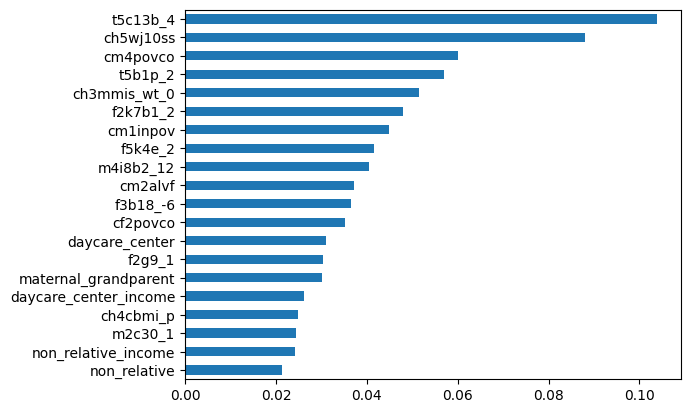

In [69]:
feat_importances = pd.Series(gpa_best.feature_importances_, index=X_train.columns).sort_values(ascending=True)[27:]
feat_importances.plot(kind='barh')

<Axes: >

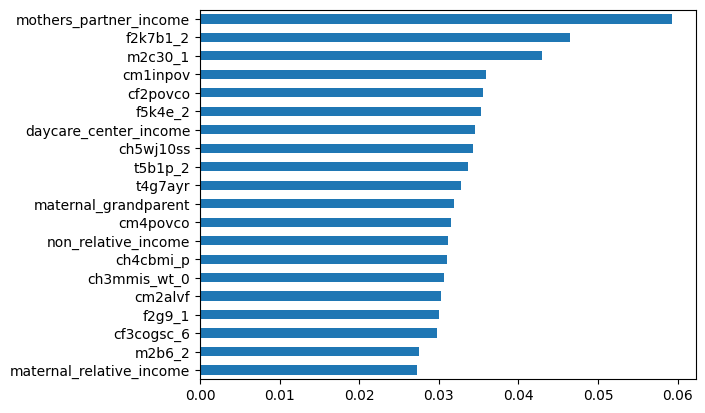

In [70]:
feat_importances = pd.Series(grit_best.feature_importances_, index=X_train.columns).sort_values(ascending=True)[27:]
feat_importances.plot(kind='barh')

### SHAP

In [71]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.9 MB/s eta 0:00:00


In [72]:
from sklearn.ensemble import RandomForestClassifier
import shap

In [86]:
not_missing_train = ~y_train['gpa'].isnull()
X_train_filtered = X_train[not_missing_train]
y_train_filtered = y_train['gpa'][not_missing_train]

explainer = shap.TreeExplainer(gpa_best)
shap_values = explainer.shap_values(X_train_filtered)

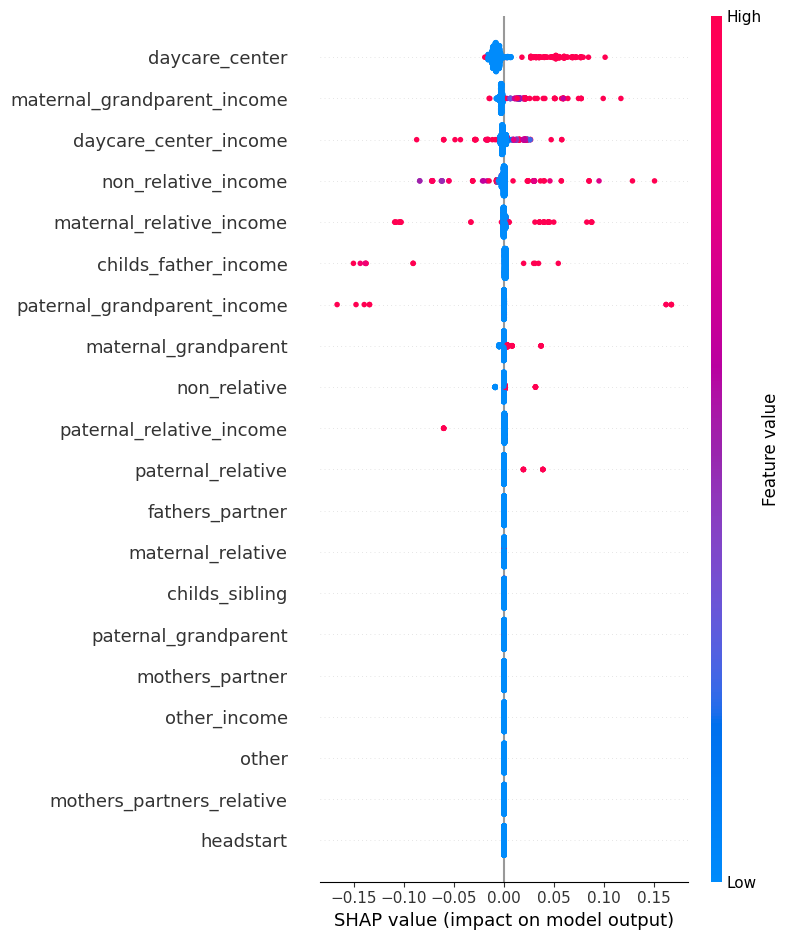

In [89]:
# Summary plot for feature importance?
shap_interest = shap_values[:, 21:]
interest_variables = X_train_filtered.iloc[:,21:]
shap.summary_plot(shap_interest, interest_variables)

In [90]:
not_missing_train = ~y_train['grit'].isnull()
X_train_filtered = X_train[not_missing_train]
y_train_filtered = y_train['grit'][not_missing_train]

explainer = shap.TreeExplainer(grit_best)
shap_values = explainer.shap_values(X_train_filtered)

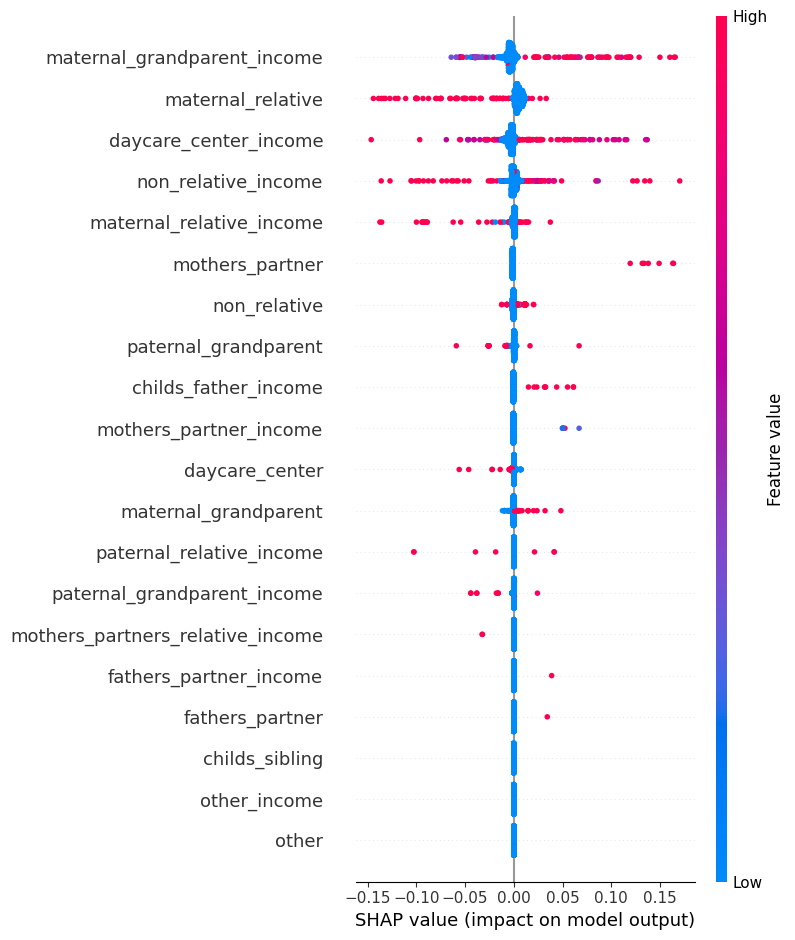

In [91]:
# Summary plot for feature importance?
shap_interest = shap_values[:, 21:]
interest_variables = X_train_filtered.iloc[:,21:]
shap.summary_plot(shap_interest, interest_variables)

### Partial Dependence Plots

In [ ]:
not_missing_train = ~y_train['gpa'].isnull()
X_train_filtered = X_train[not_missing_train]
y_train_filtered = y_train['gpa'][not_missing_train]

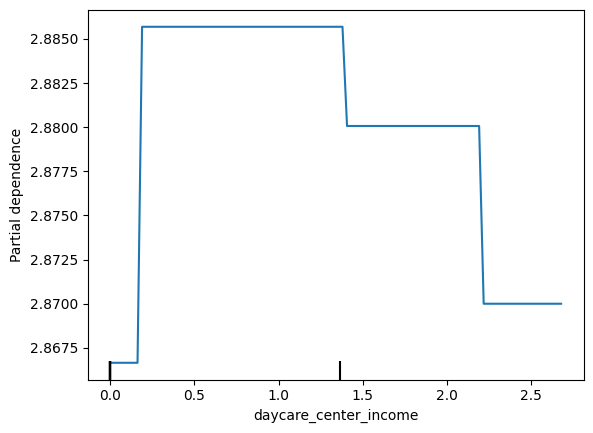

In [106]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(gpa_best, X_train_filtered, features = [44])
plt.show()

In [104]:
not_missing_train = ~y_train['grit'].isnull()
X_train_filtered = X_train[not_missing_train]
y_train_filtered = y_train['grit'][not_missing_train]

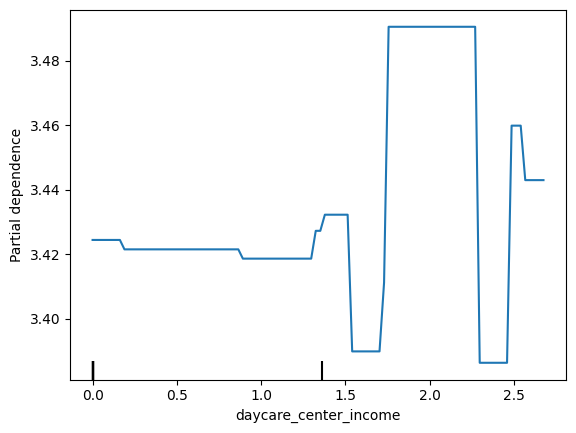

In [105]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(grit_best, X_train_filtered, features = [44])
plt.show()